# 7. Priprava podatkov za strojno učenje

(napisal Gjorgji Noveski, JSI, Slovenija in Marija Markovska Dimitrovska, FEEIT, Makedonija)

Priprava podatkov za strojno učenje je postopek priprave neobdelanih podatkov na tak način, da so primerni za algoritme strojnega učenja. Cilj priprave podatkov je zagotoviti, da so podatki točni, popolni in dosledni ter da so v obliki, ki jo lahko algoritmi učinkovito uporabljajo. Z ustrezno pripravo podatkov lahko izboljšate natančnost in učinkovitost modela, kar vodi do boljših vpogledov in napovedi.

Nekateri ključni koraki pri pripravi podatkov za strojno učenje so naslednji:

- **Zbiranje podatkov**: To je prvi korak v postopku priprave podatkov. Podatke lahko zberete iz različnih virov, kot so podatkovne zbirke, vmesniki API, ekstrakcija podatkov s spleta in ankete.
- **Čiščenje podatkov**: V tem koraku odstranimo nepomembne ali podvojene podatke, popravimo napake in dopolnimo manjkajoče vrednosti.
- **Označevanje podatkov**: Pri tem postopku, znanem tudi kot anotacija podatkov, se podatkom dodajo ciljni atributi in jih označijo, da se lahko model strojnega učenja nauči, kakšne napovedi naj pripravi.
- **Izvleček lastnosti**: Ta korak vključuje izbiro in ekstrakcijo ustreznih atributov iz podatkov, ki bodo verjetno vplivale na uspešnost modela.
- **Delitev podatkov**: Ko so podatki pripravljeni, se razdelijo na učne, validacijske in testne nize;
- **Povečanje podatkov**: Ta korak vključuje ustvarjanje dodatnih podatkov z dodajanjem šuma, vrtenjem ali obračanjem obstoječih podatkov, da se poveča velikost učnega nabora in izboljša robustnost modela.

V tem poglavju bodo obravnavani vsi navedeni ključni koraki. Za začetek morate uvoziti nekaj paketov, ki vam bodo pomagali pri pripravi podatkov. Ti paketi ali knjižnice so:
- **pandas** za delo s tabelaričnimi podatki;
- **numpy** za matematične operacije;
- **sklearn** za algoritme strojnega učenja in druge priročne funkcije;
- **matplotlib** za prikazovanje diagramov in grafov;
- **skimage** za obdelavo slik.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm
from skimage import io 
from skimage import transform
from skimage.transform import rotate, AffineTransform
from skimage.util import random_noise
from skimage.filters import gaussian
from skimage import util

## 7.1. Zbiranje podatkov

V tem primeru bo uporabljen majhen nabor podatkov. Zbran je iz ankete, opravljene na dveh različnih srednjih šolah. V tem podatkovnem nizu so za vsakega dijaka podatki, kot so: njegovo ime, starost, spol, višina v centimetrih, katero srednjo šolo obiskuje in njegova povprečna ocena (1 je najnižja, 5 je najvišja).

Prvi korak je nalaganje nabora podatkov. Da bi videli, s čim se ukvarjate, ga morate izpisati. Če je nabor podatkov velik, lahko z ukazom **dataset.head()** izpišete samo glavo nabora podatkov.

In [2]:
dataset = pd.read_csv('https://raw.githubusercontent.com/VALENCEML/eBOOK/main/EN/07/sample_dataset.txt')
dataset

,Full name,age,sex,height,school,average grade
0,Roberta Guzman,14.0,f,150.00,High school Charles,3.5
1,Christina Griffith,14.0,f,166.00,High school Charles,3.3
2,Harvey Aguilar,35.0,m,152.00,High school Charles,2.0
3,Vicky Mack,18.0,f,158.00,High school Charles,2.5
4,Kelley Freeman,18.0,f,167.00,High school Charles,4.5
5,Robin Horton,17.0,f,160.00,High school Charles,4.0
6,Margie Steele,15.0,f,NaN,High school Charles,3.0
7,Verna Holland,17.0,f,170.00,High school Charles,3.1
8,Lenny Parker,17.0,m,182.00,High school Charles,10.1
9,Marvin Massey,16.0,m,172.00,High school Charles,3.7


Če si ogledate natisnjene podatke, lahko to opazite:
- Podatkovna zbirka vsebuje nekaj praznih celic: "v vrstici 6, "starost" v vrstici 24 in "šola" v vrstici 28;
- Nabor podatkov vsebuje napačne podatke: starost ("age") v vrstici 2 (ta starost ni logična za srednješolca), povprečna ocena("average grade") v vrstici 8 in vrstici 25 (povprečna ocena bi morala biti med 1 in 5) ter višina("height") v vrstici 18 in vrstici 25 (višina bi morala biti v centimetrih in ne v metrih).
- Podatkovna zbirka vsebuje podvojene podatke: vrstico 10 in vrstico 11 ter vrstico 20 in vrstico 21;

Zato je treba pred izvedbo analize na podatkovni zbirki podatke očistiti. 

## 7.2. Čiščenje podatkov

### 7.2.1. Prazne celice

Prazne celice lahko pri analizi podatkov dajo napačne rezultate. Prazne celice lahko obravnavate na različne načine.

#### 7.2.1.1. Odstrani vrstice

Odstranjevanje vrstic, ki vsebujejo prazne celice, je običajno v redu, saj so zbirke podatkov lahko zelo velike in ne vplivajo veliko na rezultat.

In [3]:
dataset1=dataset.dropna()
dataset1

,Full name,age,sex,height,school,average grade
0,Roberta Guzman,14.0,f,150.00,High school Charles,3.5
1,Christina Griffith,14.0,f,166.00,High school Charles,3.3
2,Harvey Aguilar,35.0,m,152.00,High school Charles,2.0
3,Vicky Mack,18.0,f,158.00,High school Charles,2.5
4,Kelley Freeman,18.0,f,167.00,High school Charles,4.5
5,Robin Horton,17.0,f,160.00,High school Charles,4.0
7,Verna Holland,17.0,f,170.00,High school Charles,3.1
8,Lenny Parker,17.0,m,182.00,High school Charles,10.1
9,Marvin Massey,16.0,m,172.00,High school Charles,3.7
10,Glenn Greer,18.0,m,180.00,High school Charles,2.9


#### 7.2.1.2. Nadomesti prazne celice

Drug način obravnavanja praznih celic je vstavljanje nove vrednosti namesto odstranjevanja celotne vrstice.

Za en stolpec lahko na primer zamenjate prazne vrednosti. Če želite spremeniti prvotni podatkovni okvir (angl.dataframe), uporabite argument **inplace = True**:

In [4]:
dataset = pd.read_csv('sample_dataset1.txt')
dataset['height'].fillna(175, inplace=True)
dataset

,Full name,age,sex,height,school,average grade
0,Roberta Guzman,14.0,f,150.00,High school Charles,3.5
1,Christina Griffith,14.0,f,166.00,High school Charles,3.3
2,Harvey Aguilar,35.0,m,152.00,High school Charles,2.0
3,Vicky Mack,18.0,f,158.00,High school Charles,2.5
4,Kelley Freeman,18.0,f,167.00,High school Charles,4.5
5,Robin Horton,17.0,f,160.00,High school Charles,4.0
6,Margie Steele,15.0,f,175.00,High school Charles,3.0
7,Verna Holland,17.0,f,170.00,High school Charles,3.1
8,Lenny Parker,17.0,m,182.00,High school Charles,10.1
9,Marvin Massey,16.0,m,172.00,High school Charles,3.7


Pogost način za zamenjavo praznih celic je izračun povprečne vrednosti, mediane ali načina stolpca. Na primer, prazne celice v stolpcu starost ("age") nadomestimo z vrednostjo mode (vrednost, ki se pojavlja najpogosteje).

In [5]:
a=dataset["age"].mode()[0]
dataset["age"].fillna(a,inplace=True)
dataset

,Full name,age,sex,height,school,average grade
0,Roberta Guzman,14.0,f,150.00,High school Charles,3.5
1,Christina Griffith,14.0,f,166.00,High school Charles,3.3
2,Harvey Aguilar,35.0,m,152.00,High school Charles,2.0
3,Vicky Mack,18.0,f,158.00,High school Charles,2.5
4,Kelley Freeman,18.0,f,167.00,High school Charles,4.5
5,Robin Horton,17.0,f,160.00,High school Charles,4.0
6,Margie Steele,15.0,f,175.00,High school Charles,3.0
7,Verna Holland,17.0,f,170.00,High school Charles,3.1
8,Lenny Parker,17.0,m,182.00,High school Charles,10.1
9,Marvin Massey,16.0,m,172.00,High school Charles,3.7


### 7.2.2. Napačni podatki

Včasih lahko napačne podatke opazite že z vpogledom v nabor podatkov, ker ste pričakovali, kakšni bi morali biti. Na primer, nekateri učenci so svojo višino zapisali v metrih namesto v centimetrih. Te napačne vrednosti lahko popravite tako, da jih nadomestite z ustreznimi (165 namesto 1,65 in 161 namesto 1,61). Če je nabor podatkov majhen (kot je ta), lahko te vrednosti zamenjate eno za drugo. Pri večjih naborih podatkov lahko ustvarite nekaj pravil, npr. določite nekaj mejnih vrednosti za dovoljene vrednosti in zamenjate vrednosti, ki so zunaj teh mej. Poskusimo to drugo možnost. Ustvarite lahko pravilo: "če je višina manjša od 3 (kar pomeni, da je vnesena v metrih), jo pomnožite s 100, da jo pretvorite v centimetre".

Prvo možnost (zamenjajte vrednosti eno za drugo) lahko preizkusite po svoje.

In [6]:
for x in dataset.index:
    if dataset.loc[x, "height"]<3:
        dataset.loc[x,"height"]=dataset.loc[x,"height"]*100
dataset

,Full name,age,sex,height,school,average grade
0,Roberta Guzman,14.0,f,150.0,High school Charles,3.5
1,Christina Griffith,14.0,f,166.0,High school Charles,3.3
2,Harvey Aguilar,35.0,m,152.0,High school Charles,2.0
3,Vicky Mack,18.0,f,158.0,High school Charles,2.5
4,Kelley Freeman,18.0,f,167.0,High school Charles,4.5
5,Robin Horton,17.0,f,160.0,High school Charles,4.0
6,Margie Steele,15.0,f,175.0,High school Charles,3.0
7,Verna Holland,17.0,f,170.0,High school Charles,3.1
8,Lenny Parker,17.0,m,182.0,High school Charles,10.1
9,Marvin Massey,16.0,m,172.0,High school Charles,3.7


Drugi primer je starost učencev. Starost srednješolcev mora biti nižja ali enaka 18 letom. Zato je 35 let očitno napačen podatek. Vrstico, ki vsebuje to starost, je treba odstraniti. 

In [7]:
for x in dataset.index:
    if dataset.loc[x, "age"] > 18:
        dataset.drop(x, inplace = True)
dataset

,Full name,age,sex,height,school,average grade
0,Roberta Guzman,14.0,f,150.0,High school Charles,3.5
1,Christina Griffith,14.0,f,166.0,High school Charles,3.3
3,Vicky Mack,18.0,f,158.0,High school Charles,2.5
4,Kelley Freeman,18.0,f,167.0,High school Charles,4.5
5,Robin Horton,17.0,f,160.0,High school Charles,4.0
6,Margie Steele,15.0,f,175.0,High school Charles,3.0
7,Verna Holland,17.0,f,170.0,High school Charles,3.1
8,Lenny Parker,17.0,m,182.0,High school Charles,10.1
9,Marvin Massey,16.0,m,172.0,High school Charles,3.7
10,Glenn Greer,18.0,m,180.0,High school Charles,2.9


Prav tako je treba odstraniti vrstice s povprečno oceno, višjo od 5.

In [8]:
for x in dataset.index:
    if dataset.loc[x, "average grade"] > 5:
        dataset.drop(x, inplace = True)
dataset

,Full name,age,sex,height,school,average grade
0,Roberta Guzman,14.0,f,150.0,High school Charles,3.5
1,Christina Griffith,14.0,f,166.0,High school Charles,3.3
3,Vicky Mack,18.0,f,158.0,High school Charles,2.5
4,Kelley Freeman,18.0,f,167.0,High school Charles,4.5
5,Robin Horton,17.0,f,160.0,High school Charles,4.0
6,Margie Steele,15.0,f,175.0,High school Charles,3.0
7,Verna Holland,17.0,f,170.0,High school Charles,3.1
9,Marvin Massey,16.0,m,172.0,High school Charles,3.7
10,Glenn Greer,18.0,m,180.0,High school Charles,2.9
11,Glenn Greer,18.0,m,180.0,High school Charles,2.9


### 7.2.3. Podvojene vrstice

Za odkrivanje podvojitev v podatkovni zbirki lahko uporabite metodo **duplicated()**. Ta metoda vrne logično vrednost za vsako vrstico: **True** za vsako podvojeno vrstico, v nasprotnem primeru **False**.

In [9]:
print(dataset.duplicated())

0     False
1     False
3     False
4     False
5     False
6     False
7     False
9     False
10    False
11     True
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21     True
22    False
23    False
24    False
26    False
27    False
28    False
29    False
30    False
dtype: bool


Za odstranitev dvojnikov lahko uporabite metodo **drop_duplicated()**.

In [10]:
dataset.drop_duplicates(inplace=True)
dataset

,Full name,age,sex,height,school,average grade
0,Roberta Guzman,14.0,f,150.0,High school Charles,3.5
1,Christina Griffith,14.0,f,166.0,High school Charles,3.3
3,Vicky Mack,18.0,f,158.0,High school Charles,2.5
4,Kelley Freeman,18.0,f,167.0,High school Charles,4.5
5,Robin Horton,17.0,f,160.0,High school Charles,4.0
6,Margie Steele,15.0,f,175.0,High school Charles,3.0
7,Verna Holland,17.0,f,170.0,High school Charles,3.1
9,Marvin Massey,16.0,m,172.0,High school Charles,3.7
10,Glenn Greer,18.0,m,180.0,High school Charles,2.9
12,Fannie Ortiz,15.0,f,164.0,High school Charles,2.8


Sedaj lahko opravimo nekaj analiz na prečiščenih podatkih.

Kakšna je povprečna višina anketiranih dijakov?

In [12]:
x=dataset["height"].mean()
formated_x="{:.2f}".format(x)
print(f"Povprečna višina anketiranih dijakov je {formated_x} centimetrov.")

Povprečna višina anketiranih dijakov je 169.27 centimetrov.


Kakšna je povprečna ocena anketiranih dijakov?

In [13]:
x=dataset["average grade"].mean()
formated_x="{:.2f}".format(x)
print(f"Povprečna ocena anketiranih dijakov je {formated_x}.")

Povprečna ocena anketiranih dijakov je 4.02.


Poglejmo, koliko različnih srednjih šol je omenjenih v naboru podatkov.

In [14]:
nm_of_schools = len(dataset['school'].unique())
print(f"V podatkovni zbirki imamo {nm_of_schools} srednjih šol, ki so:")
for school in dataset['school'].unique():
    print(school)

V podatkovni zbirki imamo 2 srednjih šol, ki so:
High school Charles
High school Wimble


## 7.2. Označevanje podatkov

Recimo, da ste profesor in želite imeti še več informacij iz tega nabora podatkov. V tem primeru bi lahko dodali informacije o tem, ali bo študent glede na povprečno oceno opravil ali ne. V nabor podatkov lahko ročno dodate še en stolpec, ki se bo imenoval "je opravil" in bo vseboval vrednosti "da" ali "ne", predstavljene kot enice in ničle.

In [15]:
dataset['je opravil'] = np.empty(len(dataset), dtype=str)
dataset['je opravil'] = np.where(dataset['average grade'] >= 3.5, 1, 0)
dataset

,Full name,age,sex,height,school,average grade,je opravil
0,Roberta Guzman,14.0,f,150.0,High school Charles,3.5,1
1,Christina Griffith,14.0,f,166.0,High school Charles,3.3,0
3,Vicky Mack,18.0,f,158.0,High school Charles,2.5,0
4,Kelley Freeman,18.0,f,167.0,High school Charles,4.5,1
5,Robin Horton,17.0,f,160.0,High school Charles,4.0,1
6,Margie Steele,15.0,f,175.0,High school Charles,3.0,0
7,Verna Holland,17.0,f,170.0,High school Charles,3.1,0
9,Marvin Massey,16.0,m,172.0,High school Charles,3.7,1
10,Glenn Greer,18.0,m,180.0,High school Charles,2.9,0
12,Fannie Ortiz,15.0,f,164.0,High school Charles,2.8,0


Vidite, da je v podatkovni zbirki dodatno dodan stolpec z imenom "je opravil". V prihodnosti lahko dodate dodatne stolpce, odvisno od tega, kaj boste morali storiti.

## 7.3. Izvleček lastnosti

Izvleček lastnosti je naloga pretvorbe atributov, ki jih že imate v naboru podatkov, v atribute, ki bodo primerne za uporabo algoritmov strojnega učenja. Ker so algoritmi zasnovani tako, da bolje obdelujejo podatke v številčni obliki, bo naslednji korak pri ekstrakciji značilnosti prav to, da se podatki pretvorijo v nekaj številčnega.

Najprej morate nabor podatkov urediti v pythonov slovar. To lahko storite, ker metoda, ki bo lastnosti pretvorila v numerične lastnosti, sprejema slovarje.

In [16]:
dataset_as_dictionary = []
for index, row in dataset.iterrows():
    row_dict = {}
    row_dict['Full name'] = row['Full name']
    row_dict['age'] = row['age']
    row_dict['sex'] = row['sex']
    row_dict['height'] = row['height']
    row_dict['school'] = row['school']
    row_dict['average grade'] = row['average grade']
    row_dict['je opravil'] = row['je opravil']
    dataset_as_dictionary.append(row_dict)

Za dosego cilja pridobivanja numeričnih značilnosti uporabite razred **DictVectorizer** iz knjižnice sklearn. Ustvarite primerek tega razreda in pokličite metodo **fit_transform()**, ki bo analizirala podatke in jih ustrezno pretvorila v številke.

In [17]:
vect = DictVectorizer()
vect.fit_transform(dataset_as_dictionary).toarray()

array([[  0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   1. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,  14. ,
          3.5, 150. ,   1. ,   1. ,   0. ,   1. ,   0. ],
       [  0. ,   1. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,  14. ,
          3.3, 166. ,   0. ,   1. ,   0. ,   1. ,   0. ],
       [  0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   1. ,   0. ,  18. ,
          2.5, 158. ,   0. ,   1. ,   0. ,   1. ,   0. ],
       [  0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   1. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ,   

Vidite lahko, da so namesto funkcij v predstavitvi niza zdaj pretvorjene v numerično predstavitev.

## 7.4. Delitev podatkov

Pomemben korak pri izdelavi modelov strojnega učenja je razdelitev podatkov na nabor podatkov za učenje in nabor podatkov za testiranje.
To morate storiti, ker če model strojnega učenja učite in testirate na istem naboru podatkov, vam rezultati ne bodo povedali, kako dobro se bo vaš model obnesel, ko bo predstavljen z novimi in nevidenimi podatki. Rešitev je torej razdelitev nabora podatkov na nabor podatkov za učenje in testiranje. Kot pove že ime, se bo ena uporabljala samo v učnem delu modela, medtem ko boste dobili metrike in domneve o modelu, ko ga boste zagnali na testnem naboru podatkov.

Za ta majhen nabor podatkov je mogoče ročno razdeliti nabor podatkov na vadbeni in testni nabor podatkov. Če pa delate z velikimi nabori podatkov, bo to postalo neizvedljivo. Za samodejno razdelitev podatkovne množice lahko uporabite koristne funkcije, ki jih ponuja knjižnica sklearn, in sicer funkcijo **train_test_split()**. Ker modeli strojnega učenja vzamejo podatke kot vhodne podatke in napovedujejo neko ciljno spremenljivko, morate funkciji posredovati isto spremenljivko.

Želite na primer predvideti, ali je učenec prejel pozitivno oceno. Vhodni podatki, ki jih morate zagotoviti modelu strojnega učenja, so splošne informacije o študentih, ne upoštevajoč njihovo povprečno oceno.

V ta namen ponovno pretvorite podatke v slovarje, ki jih boste uporabili za ekstrakcijo lastnosti, vendar le tistih podatkov, ki jih potrebujete kot vhodne podatke za model.

In [18]:
# FOR X
x_data_as_dictionary = []
for index, row in dataset.iterrows():
    row_dict = {}
    row_dict['Full name'] = row['Full name']
    row_dict['age'] = row['age']
    row_dict['sex'] = row['sex']
    row_dict['height'] = row['height']
    row_dict['school'] = row['school']
    
    x_data_as_dictionary.append(row_dict)
    

Kar zadeva ciljno spremenljivko, vam ni treba izločati nobenih lastnosti, lahko jo preprosto uporabimo takšno, kot je. Ciljna spremenljivka je stolpec "je opravil" iz nabora podatkov.

In [19]:
vect = DictVectorizer()
x = vect.fit_transform(x_data_as_dictionary).toarray()
y = dataset.iloc[:, -1]

Nabor podatkov razdelite na 4 dele:
- x_train je vhodni podatek za model med učenjem;
- y_train je ciljna spremenljivka, ki bo uporabljena med učenjem modela;

- x_test je vhodni podatek za model, ko želite narediti napoved ali izračunati, kako dobro deluje vaš model;
- y_test je ciljna spremenljivka, s katero preverite, ali je vaš model pravilno napovedal.

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

S pomočjo knjižnice sklearn ustvarite primerek modela **podpornih vektorjev**. Funkciji **fit()** posredujete podatke, ki jih potrebuje med učenjem.

In [21]:
MLModel = svm.SVC()
MLModel.fit(x_train, y_train)

SVC()

Na koncu naredite napoved o podatkih, ki jih imate v naboru podatkov za testiranje, pri čemer vsak element predstavlja, ali je učenec opravil test ali ne.

In [22]:
MLModel.predict(x_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1])

## 7.5. Povečanje podatkov

Povečanje podatkov je tehnika umetnega povečanja učnega nabora z ustvarjanjem spremenjenih kopij nabora podatkov z uporabo obstoječih podatkov. Vključuje manjše spremembe nabora podatkov ali ustvarjanje novih podatkovnih točk. 

Najpogostejši primer uporabe povečanja podatkov je pri slikah. Nekateri modeli strojnega učenja so zasnovani tako, da kot vhodne podatke sprejemajo slike. Slike so predstavljene kot tridimenzionalna polja, pri čemer je ena dimenzija širina, druga višina, tretja pa barva (rdeča, zelena, modra). Vrednosti polj širine in višine predstavljajo intenzivnost pikslov določene barve in se gibljejo od 0 do 256.

V primeru razširitve slike obstajajo položajne transformacije, kot so:
- Vodoravno obračanje
- Obračanje navpično
- Povečava
- Vrtenje
- Obrezovanje
- itd.

in barvne transformacije, kot so:
- Svetilnost
- Kontrast
- itd.

Naložimo preprosto sliko in preizkusimo nekaj tehnik razširitve.

In [23]:
image = io.imread('https://github.com/VALENCEML/eBOOK/raw/main/EN/07/flower.jpg')

(-0.5, 1279.5, 959.5, -0.5)

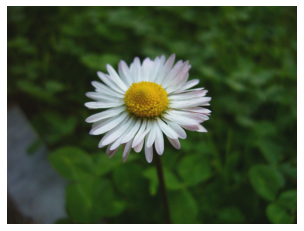

In [24]:
plt.imshow(image)
plt.axis('off')

### 7.5.1. Rotiranje

Rotacija za 45 stopinj.

(-0.5, 1279.5, 959.5, -0.5)

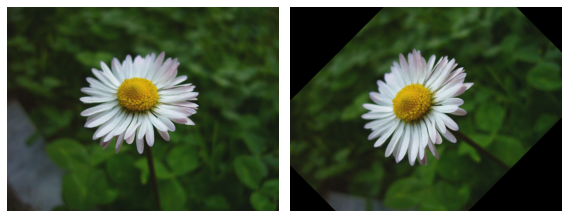

In [25]:
augmentation1=rotate(image, angle=45)
fig=plt.figure(tight_layout='auto', figsize=(8,4))
fig.add_subplot(121)
plt.imshow(image)
plt.axis('off')
fig.add_subplot(122)
plt.imshow(augmentation1)
plt.axis('off')

### 7.5.2. Obračanje navpično

(-0.5, 1279.5, 959.5, -0.5)

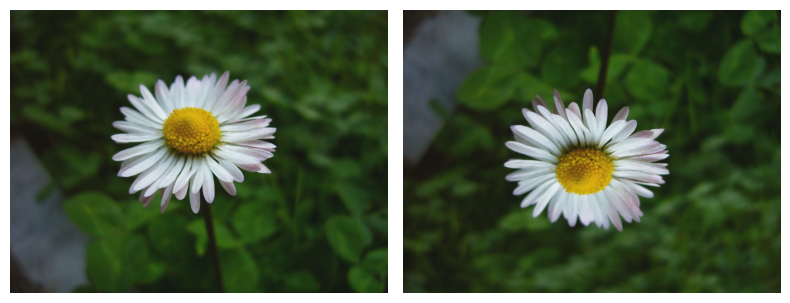

In [7]:
augmentation2=np.flipud(image)
fig=plt.figure(tight_layout='auto', figsize=(8,4))
fig.add_subplot(121)
plt.imshow(image)
plt.axis('off')
fig.add_subplot(122)
plt.imshow(augmentation2)
plt.axis('off')

### 7.5.3. Obračanje vodoravno

(-0.5, 1279.5, 959.5, -0.5)

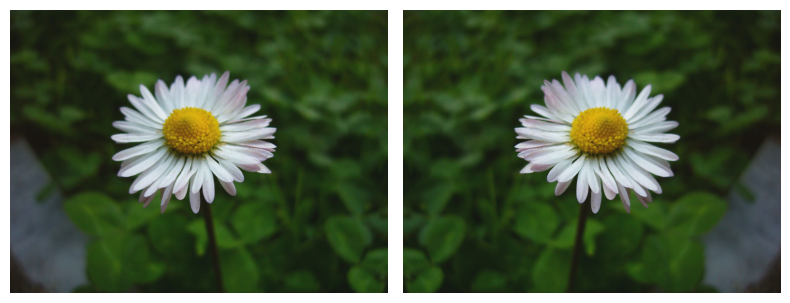

In [8]:
augmentation3=np.fliplr(image)
fig=plt.figure(tight_layout='auto', figsize=(8,4))
fig.add_subplot(121)
plt.imshow(image)
plt.axis('off')
fig.add_subplot(122)
plt.imshow(augmentation3)
plt.axis('off')

### 7.5.4. Obrezovanje

Izpiši dimenzije slike.

In [9]:
image.shape

(960, 1280, 3)

Obreži sliko po višini in širini.

(-0.5, 599.5, 399.5, -0.5)

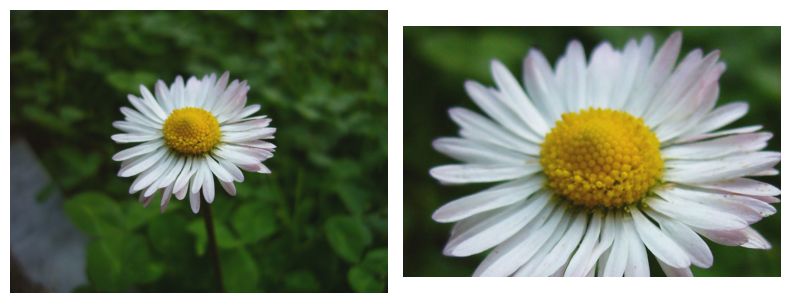

In [10]:
augmentation4=image[200:600,300:900]
fig=plt.figure(tight_layout='auto', figsize=(8,4))
fig.add_subplot(121)
plt.imshow(image)
plt.axis('off')
fig.add_subplot(122)
plt.imshow(augmentation4)
plt.axis('off')

### 7.5.5. Dodajanje naključnega šuma

(-0.5, 1279.5, 959.5, -0.5)

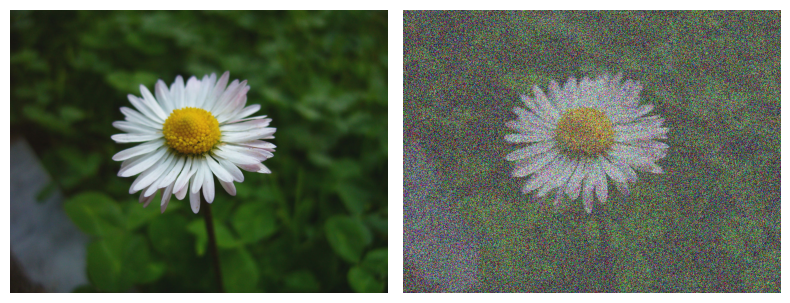

In [11]:
augmentation5=random_noise(image, var=0.1**0.1)
fig=plt.figure(tight_layout='auto', figsize=(8,4))
fig.add_subplot(121)
plt.imshow(image)
plt.axis('off')
fig.add_subplot(122)
plt.imshow(augmentation5)
plt.axis('off')

### 7.5.6. Spreminjanje svetilnosti

Če želite spremeniti svetlost, morate najprej normalizirati vrednosti slikovnih pik v območju od 0 do 1. To storite tako, da izvirne vrednosti delite z 255 (ker je to največja vrednost).

(-0.5, 1279.5, 959.5, -0.5)

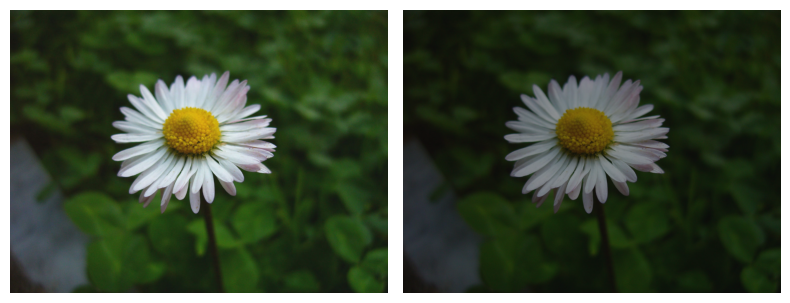

In [12]:
image1=image/255
augmentation6=image1*0.6
fig=plt.figure(tight_layout='auto', figsize=(8,4))
fig.add_subplot(121)
plt.imshow(image)
plt.axis('off')
fig.add_subplot(122)
plt.imshow(augmentation6)
plt.axis('off')

### 7.5.7. Obračanje razpona intenzivnosti

Največja vrednost piksla postane najmanjša (255 postane 0) in obratno.

(-0.5, 1279.5, 959.5, -0.5)

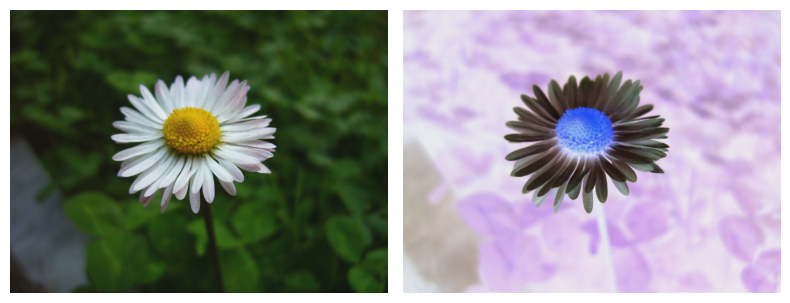

In [15]:
augmentation7=util.invert(image)
fig=plt.figure(tight_layout='auto', figsize=(8,4))
fig.add_subplot(121)
plt.imshow(image)
plt.axis('off')
fig.add_subplot(122)
plt.imshow(augmentation7)
plt.axis('off')